In [1]:
import pandas as pd

from significance_analysis import conduct_analysis

# Load example dataset
data = pd.read_csv("./example_dataset.csv")


In [2]:
from itertools import combinations

def get_all_groupings(list:list):

    seen_permutations=set()
    for groupsize in range(len(list)):
        for permutation in [*combinations(list,groupsize)]:
            seen_permutations.add(permutation)
    seen_permutations.remove(())
    final_list=[]
    def loop(remaining_perm,piece, baseline):
        for subgroup in remaining_perm:
            duplicate=False
            #print(f"Does {subgroup} add something to {piece}? Look at Subpieces of {piece} to check for duplicates.")
            for subpiece in piece:
                #print("Subpiece: ",subpiece)
                if not set(subpiece).isdisjoint(set(subgroup)):
                    #print(f"Subpiece {subpiece} contains element from {subgroup}")
                    duplicate=True
                    break
            if not duplicate:
                new_piece=piece.copy()
                new_piece.append(subgroup)
                #print(f"No duplicates! Extend piece to {new_piece}")
                complete=True
                #print("Check for completeness")
                for element in baseline:
                    if not any(element in sublist for sublist in new_piece):
                        #print(f"Element {element} is not in the piece {new_piece} yet.")
                        complete=False
                        break
                if complete:
                    #print("Piece is complete! ", new_piece)
                    #print("Checking if already in final list")
                    included=False
                    for final_element in final_list:
                        included_in_phrase=True
                        #print("Comparing element from final_list: ",set(final_element))
                        for subpiece in new_piece:
                            sub_included=False
                            for subelement in set(final_element):                            
                                #print(f"Comparing subelement {subelement} to subpiece {subpiece}")
                                if set(subelement)==set(subpiece):
                                    #print(f"Subpiece {subpiece} included in {final_element}")
                                    sub_included=True
                            if not sub_included:
                                included_in_phrase=False
                        if included_in_phrase:
                            included=True
                    if not included or final_list==[]:
                        #print("New piece not yet in list! ",new_piece)
                        final_list.append(new_piece)
                        #print(f"Appended to list, now being: {final_list}")
                else:
                    #print(f"Start loop with new piece {new_piece}\n")
                    sub_permutation_list=remaining_perm.copy()
                    for subpiece in new_piece:
                        if subpiece in sub_permutation_list:
                            sub_permutation_list.remove(subpiece)
                    #print(f"Permutations to choose from: {sub_permutation_list}")
                    loop(sub_permutation_list,new_piece,baseline)


    for starter in seen_permutations:
        #print("\nStarter:",starter)
        loop(seen_permutations,[starter],list)
    return final_list




In [3]:
baseline=range(10)

def add_new_element(prev_list:list,new_element):
    new_list=[]
    for prev_element in prev_list:
        new_el=list(prev_element.copy())
        new_el.append([new_element])
        new_list.append(new_el.copy())
    for prev_element in prev_list:
        for i,sub_element in enumerate(prev_element):
            next_element=prev_element.copy()
            new_sub=sub_element.copy()
            new_sub.append(new_element)
            next_element[i]=new_sub.copy()
            new_list.append(next_element)
    return new_list

def groupings(whole_list:list):
    result_list=[[]]
    for new_element in whole_list:
        result_list=add_new_element(result_list,new_element)
    return result_list
groupings(baseline)
print("Done")

import time
runtime_fast=[]
runtime_slow=[]
# get the start time
for i in range(6,13):
    st = time.process_time()
    groupings(range(i))
    et=time.process_time()
    runtime_fast.append(et-st)
    print(f"At {i}: Fast: {et-st}")
    st = time.process_time()
    #get_all_groupings(range(i))
    et=time.process_time()
    runtime_slow.append(et-st)
    #print(f"At {i}: Slow: {et-st}")
print(runtime_fast)
print(runtime_slow)

Done
At 6: Fast: 0.0
At 7: Fast: 0.0
At 8: Fast: 0.0
At 9: Fast: 0.0
At 10: Fast: 0.125
At 11: Fast: 0.40625
At 12: Fast: 2.796875
[0.0, 0.0, 0.0, 0.0, 0.125, 0.40625, 2.796875]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# Second Analysis: Analyse performance of acquisition functions over all benchmarks binned by trainingrounds,
# i.e. performance in the first 8, the next 12, the next 15, the next 10 and the final 5 rounds.
# Does not print the results, only shows plots.
results=conduct_analysis(
    data,
    "mean",
    "acquisition",
    "benchmark",
    show_plots=False,
    summarize=False,
    subset=("benchmark","a")
)


In [4]:

benchmarks=data["benchmark"].unique()
scores=pd.DataFrame()
scores["Acquisition"]=results[benchmarks[0]][1][0]["acquisition"]
for bm in benchmarks:
    scores[bm]=results[bm][1][0]["Estimate"]

scores


,Acquisition,Branin,Hartmann6,Jahs_Bench,NN_HPO_Bench
1,ExpectedImprovement,3.562,-2.413,21.886,0.003
2,ProbabilityOfImprovement,3.361,-1.541,22.563,0.003
3,UpperConfidenceBound,3.735,-2.335,22.110,0.003
4,qExpectedImprovement,3.465,-2.464,22.282,0.003
5,qKnowledgeGradient,3.937,-2.483,23.563,0.003
6,qProbabilityOfImprovement,4.582,-2.264,22.809,0.004
7,qSimpleRegret,3.702,-1.937,21.656,0.003
8,qUpperConfidenceBound,3.566,-2.337,22.418,0.003
9,randomSearch,4.267,-1.390,23.727,0.004


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

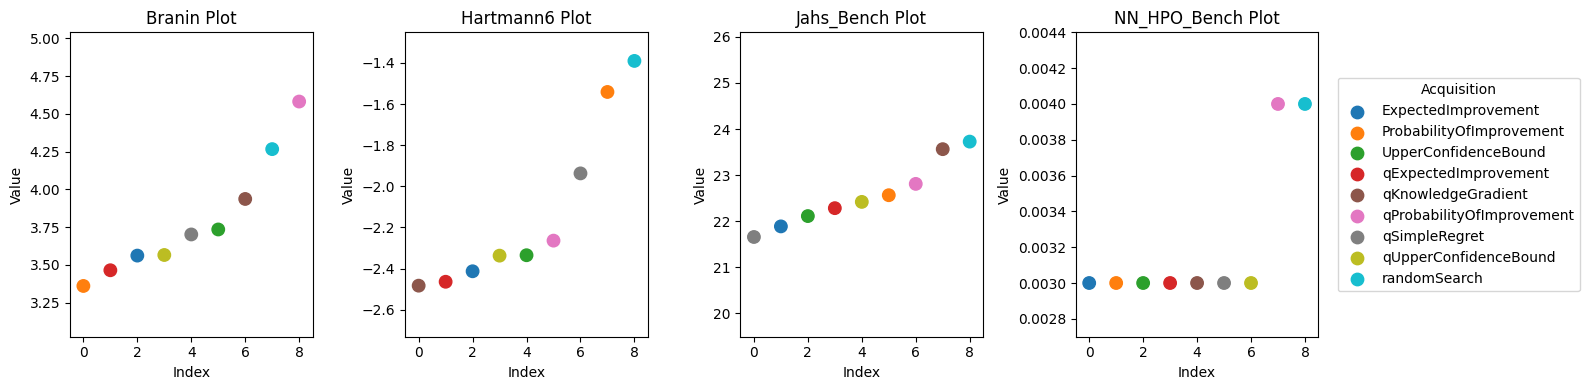

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the DataFrame
data = scores

df = pd.DataFrame(data)

# Get the column names of all the columns except 'Acquisition'
columns = df.columns[1:]

# Generate unique colors for each row
num_rows = len(df)
colors = plt.cm.tab10(np.linspace(0, 1, num_rows))

# Set up the subplots with individual y-axis scales
fig, axs = plt.subplots(1, len(columns), figsize=(4 * len(columns), 4), sharey=False)

# Plot the columns separately
for i, column in enumerate(columns):
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'{column} Plot')

    # Sort the data points in increasing order
    sorted_indices = df[column].argsort()
    sorted_values = df[column].values[sorted_indices]
    sorted_acquisition = df['Acquisition'].values[sorted_indices]

    # Plot the sorted values with larger data points
    axs[i].scatter(range(num_rows), sorted_values, c=colors[sorted_indices], s=80)

    # Zoom in to show all data points
    axs[i].set_xlim(-0.5, num_rows - 0.5)
    ymin, ymax = sorted_values.min(), sorted_values.max()
    axs[i].set_ylim(ymin - 0.1 * abs(ymin), ymax + 0.1 * abs(ymax))

# Create a dummy scatter plot for the legend
dummy_scatters = [plt.scatter([], [], c=color,s=80) for color in colors]

# Create the legend
legend_labels = df['Acquisition'].values
legend = plt.legend(dummy_scatters, legend_labels, loc='center left', bbox_to_anchor=(1.05, 0.5), title='Acquisition')

# Adjust spacing to accommodate the legend
plt.subplots_adjust(right=0.85)

# Show the plot
plt.tight_layout()
plt.show()
